<a href="https://colab.research.google.com/github/jooyeongkang/kaggle-chest-x-ray-images-pneumonia/blob/master/ChestXRay_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import libraries

In [1]:
! pip install --upgrade pip &> /dev/null
! pip install tensorflow &> /dev/null
! pip install -q kaggle &> /dev/null

In [2]:
from google.colab import drive
drive.mount('/gdrive')

##from google.colab import files
#uploaded = files.upload()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load data

## Jooyeong's Path

In [4]:
# Train Data
dir_dt_train = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)

# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

## Jin's Path

In [5]:
"""# Train Data _Jin's data
dir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)
# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)"""

"# Train Data _Jin's data\ndir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'\ndir_dt_train = pathlib.Path(dir_dt_train)\n# Validation Data(merged to the train data due to the small amount of validation data)\n#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'\n#dir_dt_val = pathlib.Path(dir_dt_val)\n\n# Test Data\ndir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'\ndir_dt_test = pathlib.Path(dir_dt_test)"

In [6]:
"""# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Validation Data
dir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'
dir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'
dir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)
dir_dt_val_normal = pathlib.Path(dir_dt_val_normal)

dt_val_pneumonia = list(dir_dt_val_pneumonia.glob('*.jpeg'))
dt_val_normal = list(dir_dt_val_normal.glob('*.jpeg'))

img_cnt_val_pneumonia = len(dt_val_pneumonia)
img_cnt_val_normal = len(dt_val_normal)

print('Validation Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_val_pneumonia), len(dt_val_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))"""

"# Train Data\ndir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'\ndir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'\ndir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)\ndir_dt_train_normal = pathlib.Path(dir_dt_train_normal)\n\ndt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))\ndt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))\n\nimg_cnt_train_pneumonia = len(dt_train_pneumonia)\nimg_cnt_train_normal = len(dt_train_normal)\n\nprint('Training Data')\nprint('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))\n\n\n# Validation Data\ndir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'\ndir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'\ndir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)\ndir_dt_val_normal = pathlib.Path(dir_dt_val_normal)\n\ndt_val_pneumonia = list(dir_dt_val_

# Create a dataset

## Define parameters

In [7]:
batch_size = 32   # Number of Images in each batch
img_height = 180  # Size of Height for Resizing
img_width = 180   # Size of Width for Resizing

## Data Preprocessing

### Reference
**tf.keras.preprocessing.image_dataset_from_directory**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [8]:
dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training'
)

Found 5232 files belonging to 2 classes.
Using 4186 files for training.


In [9]:
dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation'
  )

Found 5232 files belonging to 2 classes.
Using 1046 files for validation.


In [10]:
num_class = len(dt_train.class_names)

# Visualize the data

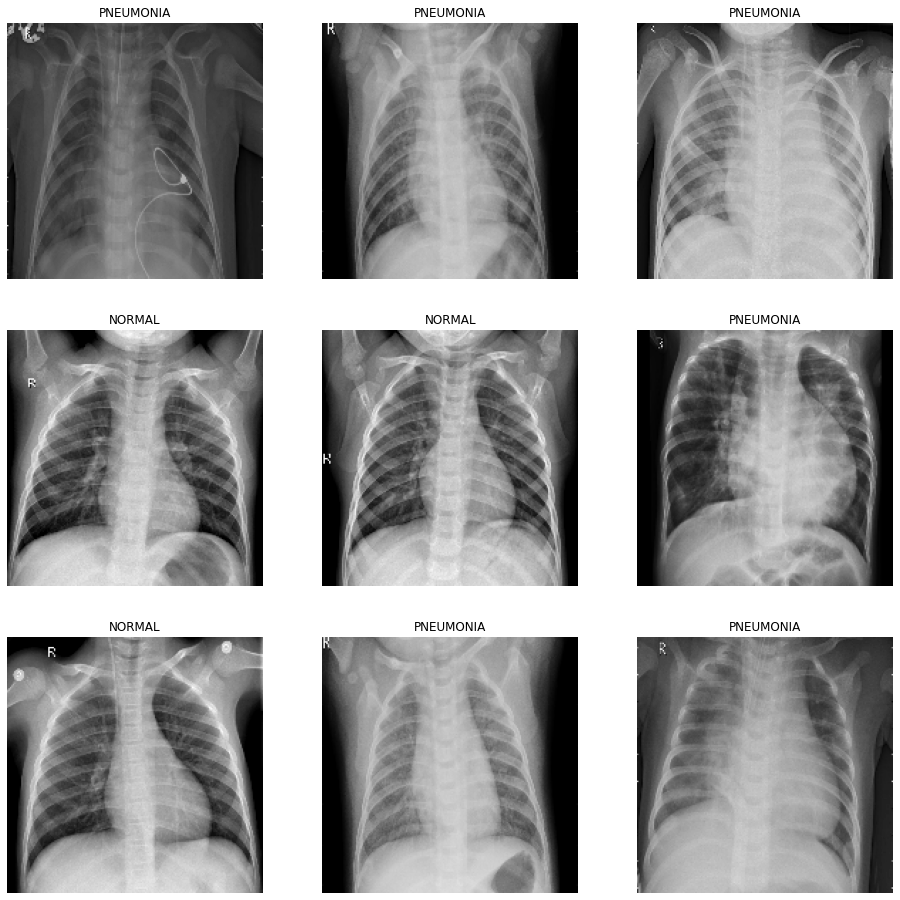

In [11]:
plt.figure(figsize=(16, 16))

for images, labels in dt_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

## Check Data Structure

### Reference
**tf.data.Dataset**

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [12]:
for image_batch, labels_batch in dt_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 1)
(32,)


## Examples of Data Augmentation

### RandomFlip

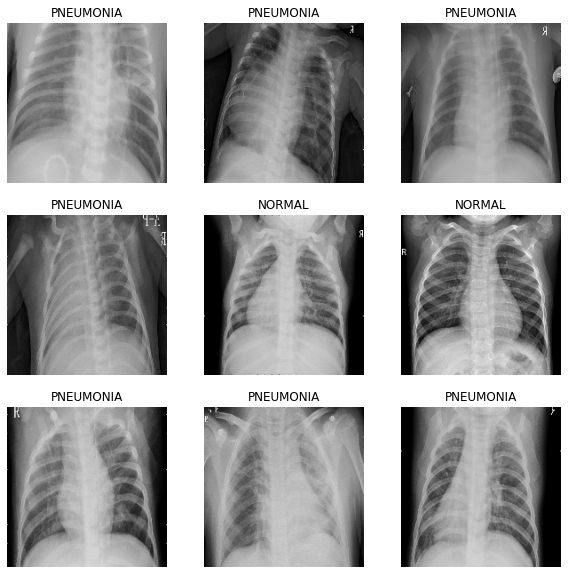

In [13]:
dt_augm_filp = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal")
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_filp(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomRotation

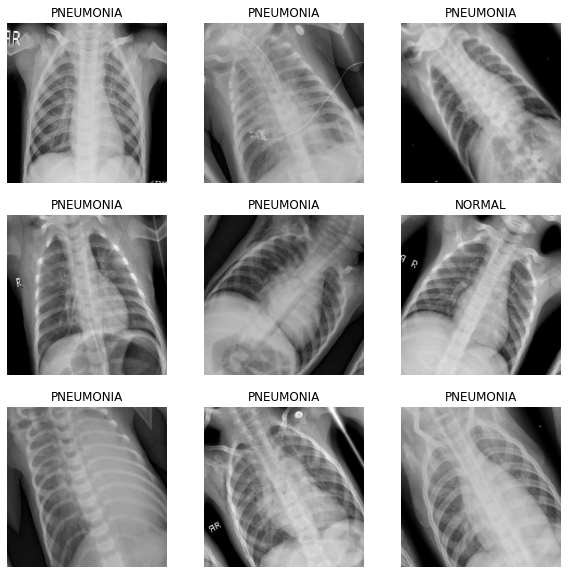

In [14]:
dt_augm_rotation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.1)
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_rotation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomZoom

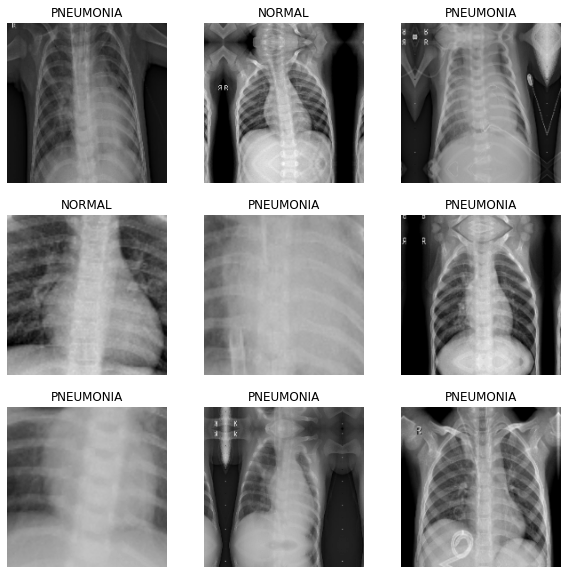

In [15]:
dt_augm_zoom = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.5)
])


plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_zoom(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

# Configure the dataset for the better performance

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

dt_train = dt_train.cache().prefetch(buffer_size=AUTOTUNE)
dt_val = dt_val.cache().prefetch(buffer_size=AUTOTUNE)


'''
Color RGB ranges from 0 to 255. For the better fit to a neural network,
standardize the range from 0 to 1.
'''
"""# Before normalizing layer
image_batch, labels_batch = next(iter(dt_train))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

normalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) 
normalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))

# After nomarlizing layer
image_batch, labels_batch = next(iter(normalized_dt))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))"""

'# Before normalizing layer\nimage_batch, labels_batch = next(iter(dt_train))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))\n\nnormalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) \nnormalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))\n\n# After nomarlizing layer\nimage_batch, labels_batch = next(iter(normalized_dt))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))'

# Experimental Designs

## Define a function to build a model(without Dropout)

### No Dropout & Data Augmentation(RandomFlip, RandomRotation, RandomZoom)

In [17]:
def build_model(dt_train, dt_augms):

  model = Sequential()
  
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

  if dt_augms == {'randomflip'}:
    print('RandomFlip')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomrotation'}:
    print('RandomRotation')
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomzoom'}:
    print('RandomZoom')
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomflip', 'randomrotation'}:
    print('RandomFlip & RandomRotation')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomflip', 'randomzoom'}:
    print('RandomFlip & RandomZoom')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomrotation', 'randomzoom'}:
    print('RandomRotation & RandomZoom')
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomflip', 'randomrotation', 'randomzoom'}:
    print('RandomFlip & RandomRotation & RandomZoom')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
       
  model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_class, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  
  return model

### 1.Apply one augmentation:

#### 1-1 RandomFlip

##### Build a model

In [18]:
dt_augms = {'randomflip'}
model_cnn = build_model(dt_train, dt_augms)
model_cnn.summary()

RandomFlip
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11,

##### Train the model

In [19]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 39s 270ms/step - loss: 1.6445 - accuracy: 0.8058 - val_loss: 0.1088 - val_accuracy: 0.9560
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1187 - accuracy: 0.9546 - val_loss: 0.0889 - val_accuracy: 0.9675
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1072 - accuracy: 0.9580 - val_loss: 0.1420 - val_accuracy: 0.9465
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0748 - accuracy: 0.9706 - val_loss: 0.0851 - val_accuracy: 0.9646
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0659 - accuracy: 0.9756 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0654 - accuracy: 0.9760 - val_loss: 0.0906 - val_accuracy: 0.9656
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0627 - accuracy: 0.9763 - val_loss: 0.0747 - val_accuracy: 0.9723
Epo

##### Plot the evaluation

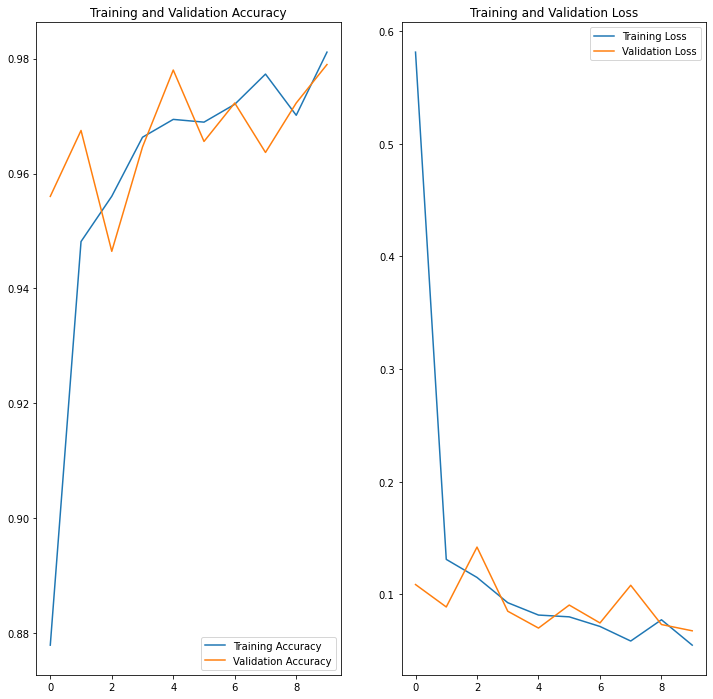

In [20]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#131/131 [==============================] - 1s 8ms/step - loss: 0.0498 - accuracy: 0.9803 - val_loss: 0.0435 - val_accuracy: 0.9837

#### 1-2 RandomRotation

##### Build a model

In [21]:
dt_augms = {'randomrotation'}
model_cnn = build_model(dt_train, dt_augms)
model_cnn.summary()

RandomRotation
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_1 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11,

##### Train the model

In [22]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 9ms/step - loss: 0.8976 - accuracy: 0.7214 - val_loss: 0.1724 - val_accuracy: 0.9379
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2192 - accuracy: 0.9128 - val_loss: 0.1212 - val_accuracy: 0.9598
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1740 - accuracy: 0.9382 - val_loss: 0.0893 - val_accuracy: 0.9656
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1400 - accuracy: 0.9439 - val_loss: 0.1078 - val_accuracy: 0.9551
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1326 - accuracy: 0.9520 - val_loss: 0.0762 - val_accuracy: 0.9723
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1221 - accuracy: 0.9523 - val_loss: 0.0861 - val_accuracy: 0.9704
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1195 - accuracy: 0.9544 - val_loss: 0.0886 - val_accuracy: 0.9646
Epoch 

##### Plot the evaluation

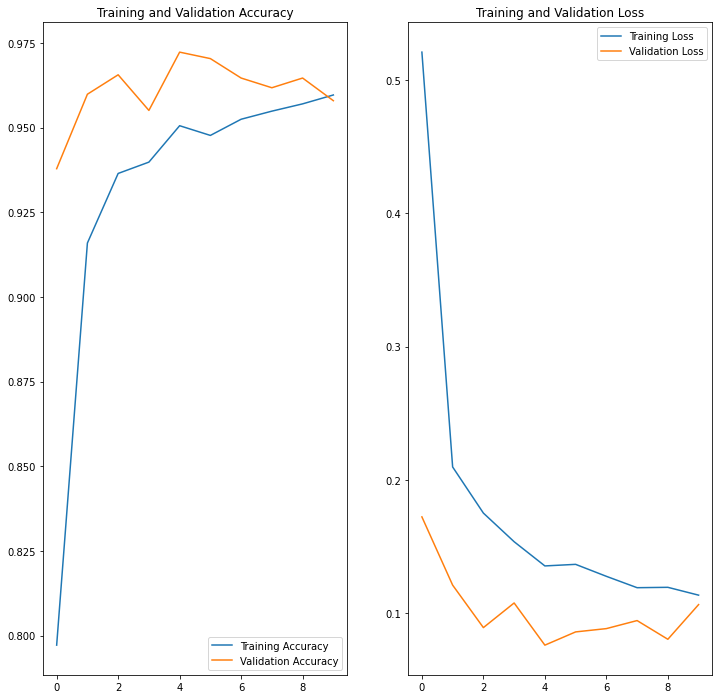

In [23]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 1-3 RandomZoom 

##### Build a model

In [24]:
dt_augms = {'randomzoom'}
model_cnn = build_model(dt_train, dt_augms)
model_cnn.summary()

RandomZoom
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom_1 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11,

Train the model

In [25]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 9ms/step - loss: 2.5783 - accuracy: 0.7587 - val_loss: 0.1152 - val_accuracy: 0.9551
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1412 - accuracy: 0.9421 - val_loss: 0.0875 - val_accuracy: 0.9646
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1040 - accuracy: 0.9614 - val_loss: 0.0563 - val_accuracy: 0.9809
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0842 - accuracy: 0.9685 - val_loss: 0.0853 - val_accuracy: 0.9732
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0700 - accuracy: 0.9736 - val_loss: 0.0642 - val_accuracy: 0.9742
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0716 - accuracy: 0.9727 - val_loss: 0.1164 - val_accuracy: 0.9589
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0787 - accuracy: 0.9728 - val_loss: 0.0657 - val_accuracy: 0.9761
Epoch 

##### Plot the evaluation

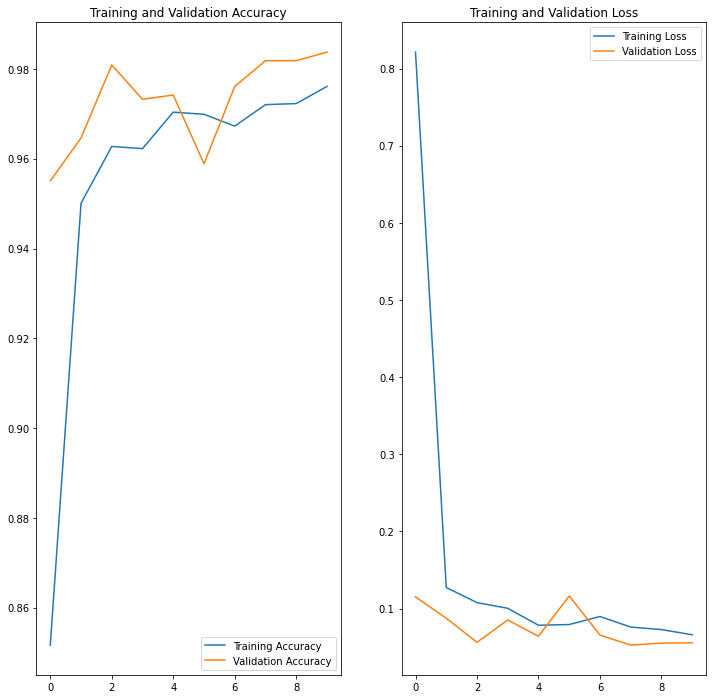

In [26]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 2.Apply two augmentations

#### 2-1 RandomFlip & RandomRotation

##### Build a model

In [27]:
dt_augms = {'randomflip', 'randomrotation'}
model_cnn = build_model(dt_train, dt_augms)
model_cnn.summary()

RandomFlip & RandomRotation
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_2 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)        

##### Train the model

In [28]:
epochs=10

model_cnn = model_cnn.fit(
    x= dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 1.6575 - accuracy: 0.7424 - val_loss: 0.1624 - val_accuracy: 0.9484
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1950 - accuracy: 0.9233 - val_loss: 0.1061 - val_accuracy: 0.9627
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1653 - accuracy: 0.9350 - val_loss: 0.1640 - val_accuracy: 0.9436
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1573 - accuracy: 0.9409 - val_loss: 0.1249 - val_accuracy: 0.9484
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1513 - accuracy: 0.9436 - val_loss: 0.1344 - val_accuracy: 0.9446
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1106 - accuracy: 0.9592 - val_loss: 0.0809 - val_accuracy: 0.9646
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1167 - accuracy: 0.9529 - val_loss: 0.0771 - val_accuracy: 0.9713
Epoch

##### Plot the evaluation

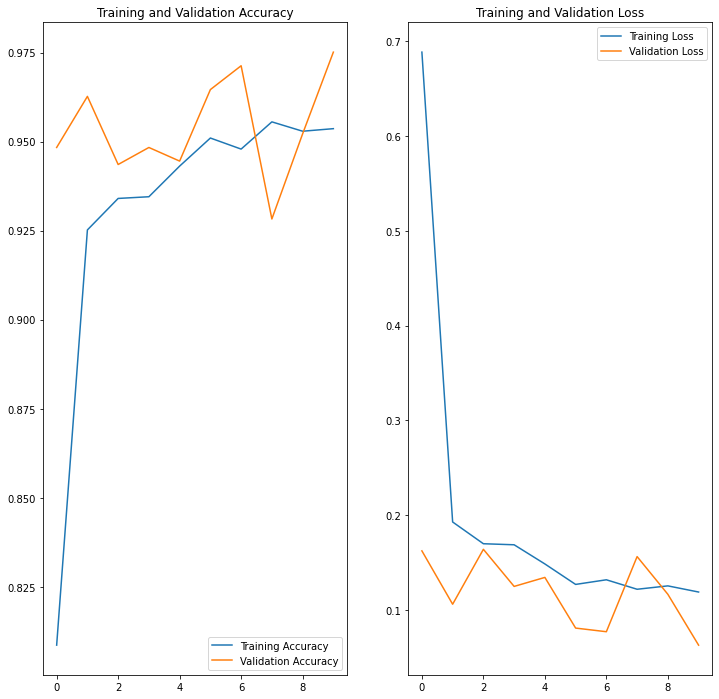

In [29]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 2-2 RandomFlip & RandomZoom

##### Build a model

In [30]:
dt_augms = {'randomflip', 'randomzoom'}
model_cnn = build_model(dt_train, dt_augms)
model_cnn.summary()

RandomFlip & RandomZoom
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_3 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (

##### Train the model

In [31]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 2.2361 - accuracy: 0.7404 - val_loss: 0.1784 - val_accuracy: 0.9321
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1592 - accuracy: 0.9397 - val_loss: 0.0941 - val_accuracy: 0.9665
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1195 - accuracy: 0.9531 - val_loss: 0.1179 - val_accuracy: 0.9493
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1071 - accuracy: 0.9549 - val_loss: 0.1282 - val_accuracy: 0.9522
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1061 - accuracy: 0.9604 - val_loss: 0.0750 - val_accuracy: 0.9751
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0983 - accuracy: 0.9636 - val_loss: 0.1015 - val_accuracy: 0.9656
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0797 - accuracy: 0.9654 - val_loss: 0.0927 - val_accuracy: 0.9675
Epoch

##### Plot the evaluation

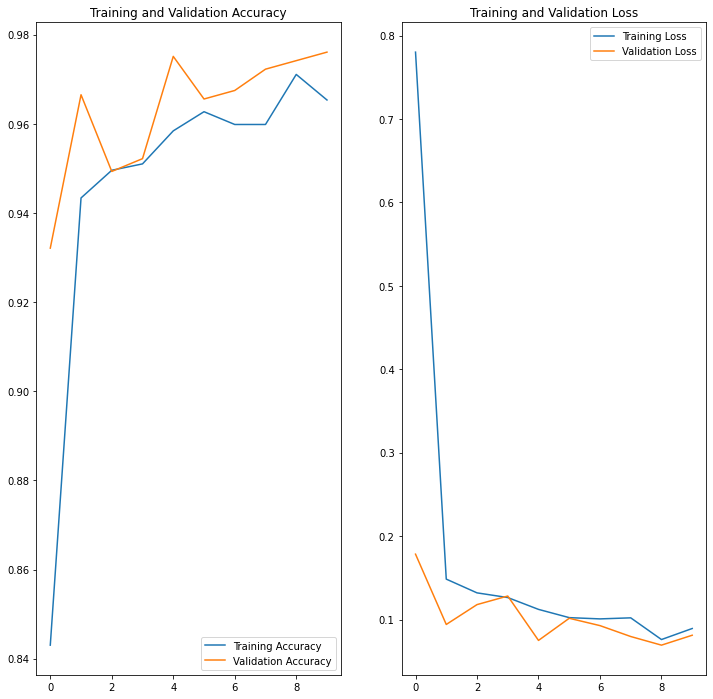

In [32]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 2-3 RandomRotation & RotationZoom

##### Build a model

In [33]:
dt_augms = {'randomrotation', 'randomzoom'}
model_cnn = build_model(dt_train, dt_augms)
model_cnn.summary()

RandomRotation & RandomZoom
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_3 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_3 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)        

##### Train the model

In [34]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 2.0104 - accuracy: 0.7787 - val_loss: 0.1665 - val_accuracy: 0.9417
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1988 - accuracy: 0.9189 - val_loss: 0.1317 - val_accuracy: 0.9570
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1730 - accuracy: 0.9318 - val_loss: 0.1019 - val_accuracy: 0.9665
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1451 - accuracy: 0.9440 - val_loss: 0.0900 - val_accuracy: 0.9646
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1432 - accuracy: 0.9489 - val_loss: 0.1089 - val_accuracy: 0.9579
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1360 - accuracy: 0.9494 - val_loss: 0.0926 - val_accuracy: 0.9656
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1331 - accuracy: 0.9493 - val_loss: 0.1245 - val_accuracy: 0.9493
Epoch

##### Plot the evaluation

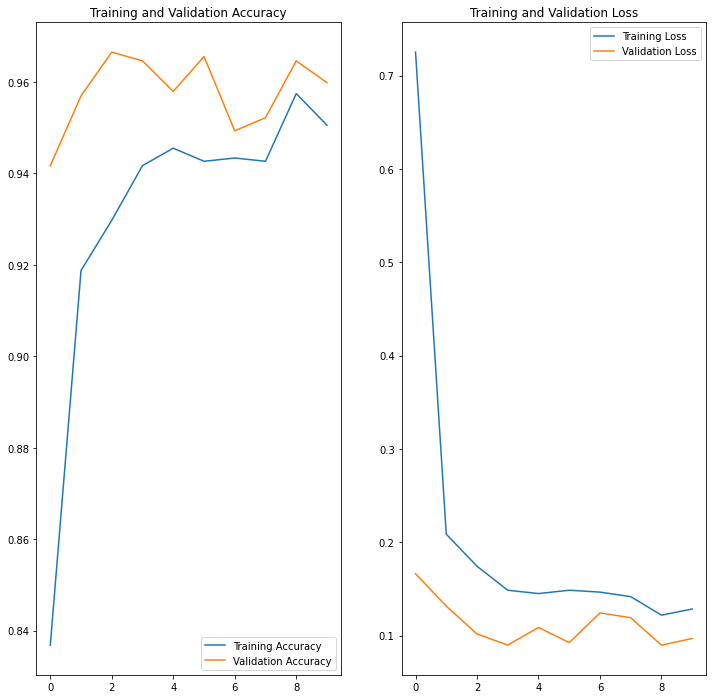

In [35]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 3.Apply all three augmentations

#### 3-1 RandomFlip & RandomRotation & RandomZoom

##### Build a model

In [36]:
dt_augms = {'randomflip', 'randomrotation', 'randomzoom'}
model_cnn = build_model(dt_train, dt_augms)
model_cnn.summary()

RandomFlip & RandomRotation & RandomZoom
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_4 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_4 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d

##### Train the model

In [37]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 0.9334 - accuracy: 0.7687 - val_loss: 0.2353 - val_accuracy: 0.9082
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2346 - accuracy: 0.9022 - val_loss: 0.1285 - val_accuracy: 0.9579
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1802 - accuracy: 0.9309 - val_loss: 0.1139 - val_accuracy: 0.9541
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1510 - accuracy: 0.9458 - val_loss: 0.1504 - val_accuracy: 0.9474
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1378 - accuracy: 0.9480 - val_loss: 0.1161 - val_accuracy: 0.9589
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1374 - accuracy: 0.9487 - val_loss: 0.0967 - val_accuracy: 0.9627
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1404 - accuracy: 0.9476 - val_loss: 0.1104 - val_accuracy: 0.9522
Epoch

##### Plot the evaluation

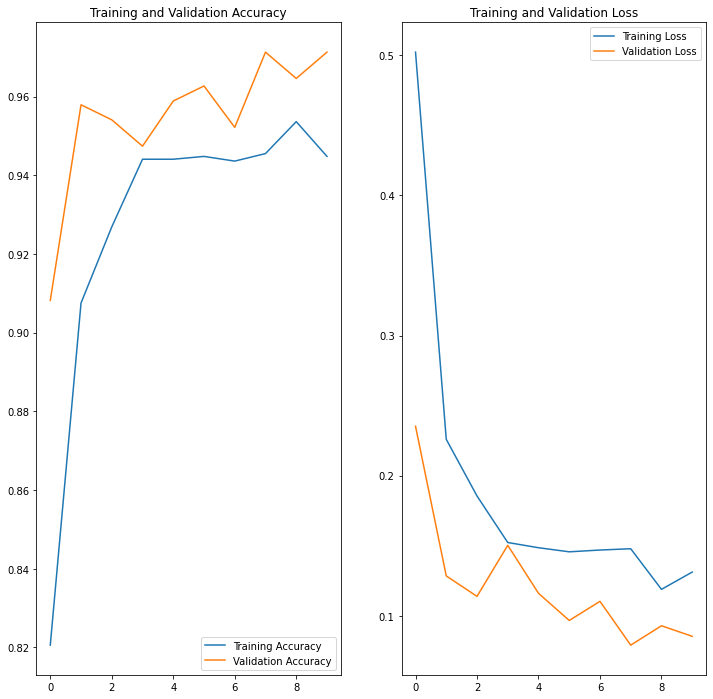

In [38]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Define a function to build a model(with Dropout)

### Dropout & Data Augmentation(Only Random Rotation)

### 1.Apply one augmentation and Dropout

#### 1-1 RandomRotation & Dropout

In [39]:
def build_model_dropout_randomrotation(dt_train):
  
  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

##### Build a model

In [40]:
model_cnn = build_model_dropout_randomrotation(dt_train)
model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_5 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 11, 11, 64)      

##### Train the model

In [41]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 1.0740 - accuracy: 0.6857 - val_loss: 0.2842 - val_accuracy: 0.8728
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.3649 - accuracy: 0.8394 - val_loss: 0.3090 - val_accuracy: 0.8442
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2602 - accuracy: 0.9057 - val_loss: 0.2339 - val_accuracy: 0.8881
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2159 - accuracy: 0.9197 - val_loss: 0.1680 - val_accuracy: 0.9302
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1799 - accuracy: 0.9288 - val_loss: 0.1138 - val_accuracy: 0.9551
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1538 - accuracy: 0.9440 - val_loss: 0.1201 - val_accuracy: 0.9532
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1695 - accuracy: 0.9405 - val_loss: 0.0855 - val_accuracy: 0.9665
Epoch

##### Plot the evaluation

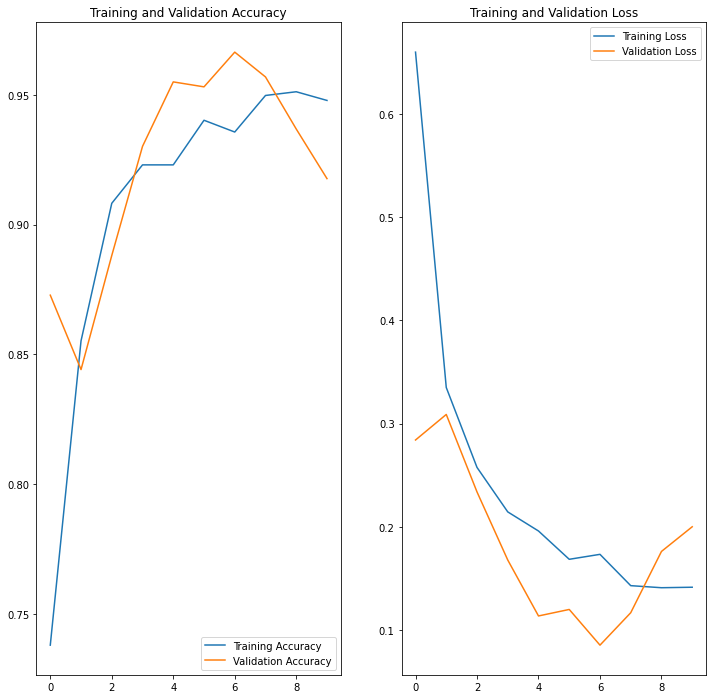

In [42]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()